In [1]:
from __future__ import division
from IPython.display import display, Math, Latex
from math import sin, cos
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, LinearLocator, NullFormatter, NullLocator, MultipleLocator
import matplotlib.ticker
import matplotlib.colors
from matplotlib.font_manager import FontProperties
from matplotlib import rc, text
import healpy as hp
from scipy.stats import norm

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
c=2.99792458*(10**8)
G=6.67428*(10**(-11))
s_mass=G*(1.98892*10**(30))/(c**3)

# common function shortcuts
log10 = np.log10
pi = np.pi
sqrt = np.sqrt



In [3]:
#pulsar list

#J0437-4715
#J0613-0200
#J1012+5307
#J1024-0719
#J1804-2717
#J1910+1256
#J1955+2908
#J2033+1734

In [4]:
# plotting preamble

fig_width_pt = 245.27 #513.17           # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

params = {'backend': 'pdf',
        'axes.labelsize': 7,
        'lines.markersize': 2,
        'font.size': 7,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.0,
        'legend.fontsize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'savefig.dpi':200,
        'path.simplify':True,
        'font.family': 'serif',
        'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True,
        #'axes.color_cycle': ['b', 'lime', 'r', 'purple', 'g', 'c', 'm', 'orange', 'darkblue', \
        #                        'darkcyan', 'y','orangered','chartreuse','brown','deeppink','lightgreen', 'k'],
        #'font.serif':cm,
        'figure.figsize': fig_size}
plt.rcParams.update(params)

# J0437-4715

In [5]:
# parallax distance measurement from VLBI observations
d_pi_PTA_0437 = 156.3 
eplus_pi_PTA_0437 = 1.3   # error on this
eminus_pi_PTA_0437 = 1.3   # error on this

# dispersion measure distance from NE 2001, https://www.nrl.navy.mil/rsd/RORF/ne2001/pulsar.cgi
d_DM_NE = 139
eplus_DM_NE = 33
eminus_DM_NE = 29

# YMW 16 DM model, http://www.atnf.csiro.au/research/pulsar/ymw16/
d_DM_YMW = 156.1 # no errors reported here...


In [6]:
x1 = d_pi_PTA_0437
dx1p = x1 + eplus_pi_PTA_0437
dx1m = x1 - eminus_pi_PTA_0437


In [7]:
# GAIA estimate placeholder
# 8.325	0.6777
gx_w = np.linspace(6, 11, 1000)
dist_gaia0437 = norm(8.325, 0.6777)

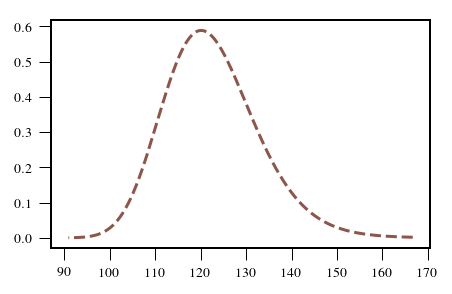

In [8]:
plt.plot(1/gx_w*1000, dist_gaia0437.pdf(gx_w), label = "GAIA?", color = "C5", linestyle='dashed')

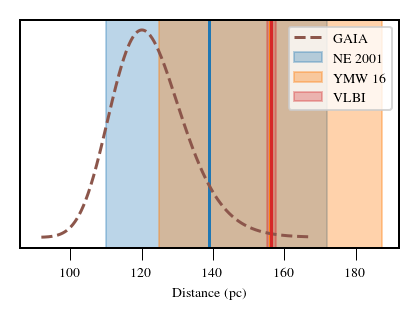

In [9]:
fig, ax1 = plt.subplots()

# DM NE 2001 model
ax1.axvspan(d_DM_NE - eminus_DM_NE, d_DM_NE+ eplus_DM_NE, alpha=0.3, color = "C0", label = "NE 2001")
plt.axvline(d_DM_NE, ymin=0, ymax=1, color = "C0")

# DM YMW16 model
ax1.axvspan(d_DM_YMW*.8, d_DM_YMW*1.2, alpha=0.35, color = "C1", label = "YMW 16")
plt.axvline(d_DM_YMW, ymin=0, ymax=1, color = "C1")

# GAIA distance, to be updated
plt.plot(1/gx_w*1000, dist_gaia0437.pdf(gx_w), label = "GAIA", color = "C5", linestyle='dashed')
# VLBI measurements
ax1.axvspan(dx1p, dx1m, alpha=0.3, color = "C3", label = "VLBI")
plt.axvline(d_pi_PTA_0437, ymin=0, ymax=1, color = "C3")

ax1.set_yticklabels([])
plt.yticks([])
plt.xlabel("Distance (pc)")
plt.legend()
plt.savefig("J0437_distances.pdf")

# J1012+5307

In [10]:
# parallax distance measurement from VLBI observations
d_pi_PTA_1012 = 1150
eplus_pi_PTA_1012 = 240   # error on this
eminus_pi_PTA_1012 = 240   # error on this

# dispersion measure distance from NE 2001, https://www.nrl.navy.mil/rsd/RORF/ne2001/pulsar.cgi
d_DM_NE_1012 = 411
eplus_DM_NE_1012 = 59
eminus_DM_NE_1012 = 56

# YMW 16 DM model, http://www.atnf.csiro.au/research/pulsar/ymw16/
d_DM_YMW_1012 = 804.5 # no errors reported here...

In [11]:
# GAIA estimate placeholder J1012
#1.3259	0.4142
gx1012 = np.linspace(0.6, 5, 1000)
dist_gaia1012 = norm(1.3259, 0.4142)

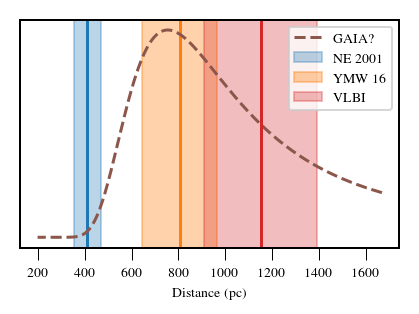

In [12]:
fig, ax1 = plt.subplots()

# DM NE 2001 model
ax1.axvspan(d_DM_NE_1012 - eminus_DM_NE_1012, d_DM_NE_1012+ eplus_DM_NE_1012, alpha=0.3, color = "C0", label = "NE 2001")
plt.axvline(d_DM_NE_1012, ymin=0, ymax=1, color = "C0")

# DM YMW16 model
ax1.axvspan(d_DM_YMW_1012*.8, d_DM_YMW_1012*1.2, alpha=0.35, color = "C1", label = "YMW 16")
plt.axvline(d_DM_YMW_1012, ymin=0, ymax=1, color = "C1")

# GAIA distance, to be updated
plt.plot(1/gx1012*1000, dist_gaia1012.pdf(gx1012), label = "GAIA?", color = "C5", linestyle='dashed')

# VLBI measurements
ax1.axvspan(d_pi_PTA_1012 - eminus_pi_PTA_1012, d_pi_PTA_1012 + eplus_pi_PTA_1012, alpha=0.3, color = "C3", label = "VLBI")
plt.axvline(d_pi_PTA_1012, ymin=0, ymax=1, color = "C3")

ax1.set_yticklabels([])
plt.yticks([])
plt.xlabel("Distance (pc)")
plt.legend()
plt.savefig("J1012_distances.pdf")

# J1024−0719

In [13]:
# parallax distance measurement from VLBI observations
d_pi_PTA_1024 = 1300
eplus_pi_PTA_1024 = 600   # error on this
eminus_pi_PTA_1024 = 300   # error on this

# dispersion measure distance from NE 2001, https://www.nrl.navy.mil/rsd/RORF/ne2001/pulsar.cgi
d_DM_NE_1024 = 386
eplus_DM_NE_1024 = 39
eminus_DM_NE_1024 = 38

# YMW 16 DM model, http://www.atnf.csiro.au/research/pulsar/ymw16/
d_DM_YMW_1024 = 382.3 # no errors reported here...

In [14]:
# GAIA estimate placeholder J1024
#0.5288	0.4259
gx1024 = np.linspace(0.2,1.1, 1000)
dist_gaia1024 = norm(0.5288, 0.4259)

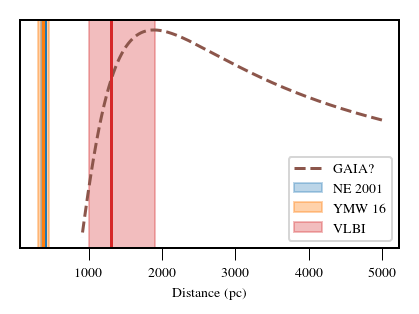

In [15]:
fig, ax1 = plt.subplots()

# DM NE 2001 model
ax1.axvspan(d_DM_NE_1024 - eminus_DM_NE_1024, d_DM_NE_1024+ eplus_DM_NE_1024, alpha=0.3, color = "C0", label = "NE 2001")
plt.axvline(d_DM_NE_1012, ymin=0, ymax=1, color = "C0")

# DM YMW16 model
ax1.axvspan(d_DM_YMW_1024*.8, d_DM_YMW_1024*1.2, alpha=0.35, color = "C1", label = "YMW 16")
plt.axvline(d_DM_YMW_1024, ymin=0, ymax=1, color = "C1")

# GAIA distance, to be updated
plt.plot(1/gx1024*1000, dist_gaia1024.pdf(gx1024), label = "GAIA?", color = "C5", linestyle='dashed')

# VLBI measurements
ax1.axvspan(d_pi_PTA_1024 - eminus_pi_PTA_1024, d_pi_PTA_1024 + eplus_pi_PTA_1024, alpha=0.3, color = "C3", label = "VLBI")
plt.axvline(d_pi_PTA_1024, ymin=0, ymax=1, color = "C3")

ax1.set_yticklabels([])
plt.yticks([])
plt.xlabel("Distance (pc)")
plt.legend()
plt.savefig("J1024_distances.pdf")


# J1804-2717

In [16]:
# dispersion measure distance from NE 2001, https://www.nrl.navy.mil/rsd/RORF/ne2001/pulsar.cgi
d_DM_NE_1804 = 776
eplus_DM_NE_1804 = 102
eminus_DM_NE_1804 = 108

# YMW 16 DM model, http://www.atnf.csiro.au/research/pulsar/ymw16/
d_DM_YMW_1804 = 800.5 # no errors reported here...

In [17]:
# GAIA estimate placeholder J1804
# 0.2395	0.2565

gx1804 = np.linspace(.1, .4, 1000)
dist_gaia1804 = norm(0.2395, 0.2565)

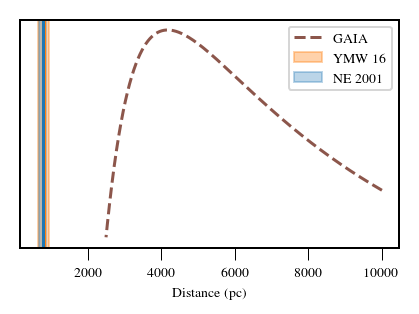

In [18]:
fig, ax1 = plt.subplots()

# DM YMW16 model
ax1.axvspan(d_DM_YMW_1804*.8, d_DM_YMW_1804*1.2, alpha=0.35, color = "C1", label = "YMW 16")
plt.axvline(d_DM_YMW_1804, ymin=0, ymax=1, color = "C1")

# DM NE 2001 model
ax1.axvspan(d_DM_NE_1804 - eminus_DM_NE_1804, d_DM_NE_1804+ eplus_DM_NE_1804, alpha=0.3, color = "C0", label = "NE 2001")
plt.axvline(d_DM_NE_1804, ymin=0, ymax=1, color = "C0")

# GAIA distance, to be updated
plt.plot(1/gx1804*1000, dist_gaia1804.pdf(gx1804), label = "GAIA", color = "C5", linestyle='dashed')

ax1.set_yticklabels([])
plt.yticks([])
plt.xlabel("Distance (pc)")
plt.legend()
plt.savefig("J1804_distances.pdf")

# J1910+1256

In [72]:
# LK distance parallax distance measurement, Desvignes et al. 2016, Table 9.
d_pi_PTA_1910 = 550
eplus_pi_PTA_1910 = 460   # error on this
eminus_pi_PTA_1910 = 460   # error on this

# dispersion measure distance from NE 2001, https://www.nrl.navy.mil/rsd/RORF/ne2001/pulsar.cgi
d_DM_NE_1910 = 2327
eplus_DM_NE_1910 = 311
eminus_DM_NE_1910 = 317

# YMW 16 DM model, http://www.atnf.csiro.au/research/pulsar/ymw16/
d_DM_YMW_1910 = 1496.0  # no errors reported here...

In [ ]:
1.44(74)

In [78]:
# PTA LK-corrected PX measurement 
px1910 = np.linspace(100, 1500, 1000)
dist_px1910 = norm(550, 460)

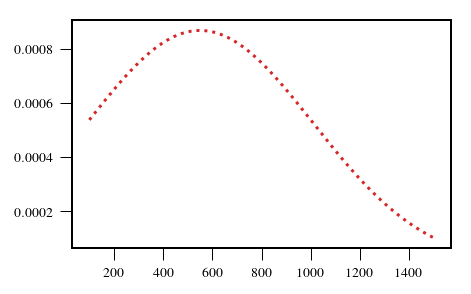

In [83]:
plt.plot(px1910, dist_px1910.pdf(px1910), label = r"PTA $D_\pi$", color = "C3", linestyle='dotted')



In [79]:
# GAIA estimate placeholder J1910
#THIS IS A NEGATIVE PARALLAX MU = -0.4219, SIGMA = 0.7972
gx1910 = np.linspace(0.2, .8, 1000)
dist_gaia1910 = norm(-0.4219, 0.7972)

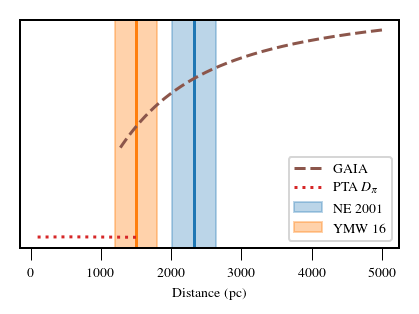

In [80]:
fig, ax1 = plt.subplots()

# DM NE 2001 model
ax1.axvspan(d_DM_NE_1910 - eminus_DM_NE_1910, d_DM_NE_1910 + eplus_DM_NE_1910, alpha=0.3, color = "C0", label = "NE 2001")
plt.axvline(d_DM_NE_1910, ymin=0, ymax=1, color = "C0")

# DM YMW16 model
ax1.axvspan(d_DM_YMW_1910*.8, d_DM_YMW_1910*1.2, alpha=0.35, color = "C1", label = "YMW 16")
plt.axvline(d_DM_YMW_1910, ymin=0, ymax=1, color = "C1")

# GAIA distance, to be updated
plt.plot(1/gx1910*1000, dist_gaia1910.pdf(gx1910), label = "GAIA", color = "C5", linestyle='dashed')

# LK-correcred PX measurements
plt.plot(px1910, dist_px1910.pdf(px1910), label = r"PTA $D_\pi$", color = "C3", linestyle='dotted')
#ax1.axvspan(d_pi_PTA_1910 - eminus_pi_PTA_1910, d_pi_PTA_1910 + eplus_pi_PTA_1910, alpha=0.3, color = "C3", label = "VLBI")
#plt.axvline(d_pi_PTA_1910, ymin=0, ymax=1, color = "C3")

ax1.set_yticklabels([])
plt.yticks([])
plt.xlabel("Distance (pc)")
plt.legend()
#plt.savefig("J1910_distances.pdf")

# J1955+2908

In [22]:
# dispersion measure distance from NE 2001, https://www.nrl.navy.mil/rsd/RORF/ne2001/pulsar.cgi
d_DM_NE_1955 = 4644
eplus_DM_NE_1955 = 577
eminus_DM_NE_1955 = 553

# YMW 16 DM model, http://www.atnf.csiro.au/research/pulsar/ymw16/
d_DM_YMW_1955 = 6306.2  # no errors reported here...

In [23]:
# GAIA estimate placeholder J1955
# 0.6034	0.1942
gx1955 = np.linspace(0.2,0.8, 1000)
dist_gaia1955 = norm(0.603, 0.1942)

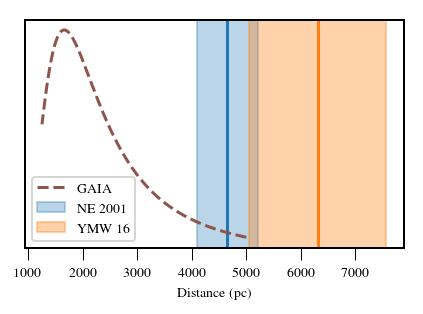

In [24]:
fig, ax1 = plt.subplots()

# DM NE 2001 model
ax1.axvspan(d_DM_NE_1955 - eminus_DM_NE_1955, d_DM_NE_1955 + eplus_DM_NE_1955, alpha=0.3, color = "C0", label = "NE 2001")
plt.axvline(d_DM_NE_1955, ymin=0, ymax=1, color = "C0")

# DM YMW16 model
ax1.axvspan(d_DM_YMW_1955*.8, d_DM_YMW_1955*1.2, alpha=0.35, color = "C1", label = "YMW 16")
plt.axvline(d_DM_YMW_1955, ymin=0, ymax=1, color = "C1")

# GAIA distance, to be updated
plt.plot(1/gx1955*1000, dist_gaia1955.pdf(gx1955), label = "GAIA", color = "C5", linestyle='dashed')


ax1.set_yticklabels([])
plt.yticks([])
plt.xlabel("Distance (pc)")
plt.legend()
plt.savefig("J1955_distances.pdf")


# J1732-5049

In [25]:
# dispersion measure distance from NE 2001, https://www.nrl.navy.mil/rsd/RORF/ne2001/pulsar.cgi
d_DM_NE_1732 = 1411
eplus_DM_NE_1732 = 206
eminus_DM_NE_1732 = 198

# YMW 16 DM model, http://www.atnf.csiro.au/research/pulsar/ymw16/
d_DM_YMW_1732 = 1875.0   # no errors reported here...

In [26]:
# GAIA estimate placeholder J1955
# NB negarive parallax -1.1837	2.8444
gx1732 = np.linspace(.17, 1.5, 1000)
dist_gaia1732 = norm(-1.1837, 2.8444)

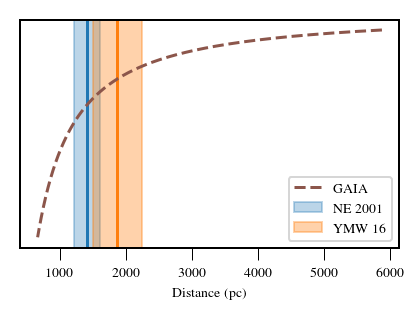

In [27]:
fig, ax1 = plt.subplots()

# DM NE 2001 model
ax1.axvspan(d_DM_NE_1732 - eminus_DM_NE_1732, d_DM_NE_1732 + eplus_DM_NE_1732, alpha=0.3, color = "C0", label = "NE 2001")
plt.axvline(d_DM_NE_1732, ymin=0, ymax=1, color = "C0")

# DM YMW16 model
ax1.axvspan(d_DM_YMW_1732*.8, d_DM_YMW_1732*1.2, alpha=0.35, color = "C1", label = "YMW 16")
plt.axvline(d_DM_YMW_1732, ymin=0, ymax=1, color = "C1")

# GAIA distance, to be updated
plt.plot(1/gx1732*1000, dist_gaia1732.pdf(gx1732), label = "GAIA", color = "C5", linestyle='dashed')


ax1.set_yticklabels([])
plt.yticks([])
plt.xlabel("Distance (pc)")
plt.legend()
plt.savefig("J1732_distances.pdf")

In [28]:
MGlist = [15.0112952108918, 3.56911521202147, 10.2381408530516, 7.79997723238792, 
          11.4246459729484, 9.28347772655008, 7.61507452919485]
bprp = [1.548225, 1.106436, 0.274221, 1.834633, 1.530455, 1.691048, 2.919764]

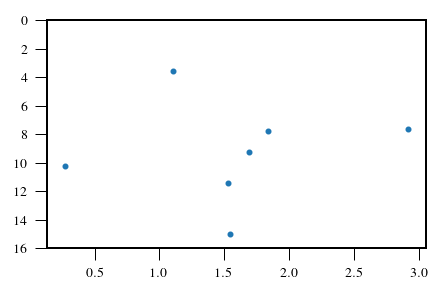

In [29]:
plt.scatter(bprp, MGlist)
plt.ylim(16, 0)
plt.show()

# J1744-1134

In [33]:
# dispersion measure distance from NE 2001, https://www.nrl.navy.mil/rsd/RORF/ne2001/pulsar.cgi
# DM = 3.13590
# l = 14.7939, b = 9.1795

d_DM_NE_1744 = 414
eplus_DM_NE_1744 = 17
eminus_DM_NE_1744 = 16

# YMW 16 DM model, http://www.atnf.csiro.au/research/pulsar/ymw16/
d_DM_YMW_1744 = 148.1   # no errors reported here...

In [34]:
#PX from par file
px1744 = np.linspace(2.0, 3.0, 1000)
dist_px1744 = norm(2.4666340693407614979, 0.07324684023396225985)


In [47]:
#GAIA 
# mu = 1.3528, sigma = 1.3632
gx1744 = np.linspace(0.1, 2, 1000)
dist_gaia1744 = norm(1.3528, 1.3632)

(0, 800)

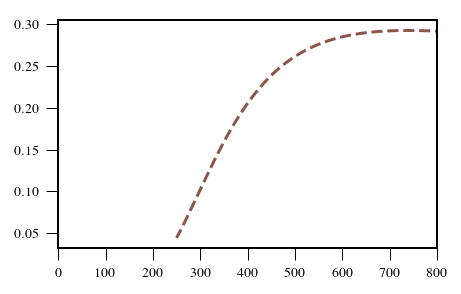

In [65]:
gx1744 = np.linspace(0.01, 4, 1000)
dist_gaia1744 = norm(1.3528, 1.3632)
plt.plot(1/gx1744*1000, dist_gaia1744.pdf(gx1744), label = "GAIA", color = "C5", linestyle='dashed')
plt.xlim(0,800)

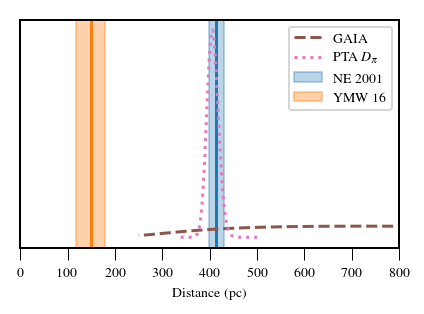

In [71]:
fig, ax1 = plt.subplots()

# DM NE 2001 model
ax1.axvspan(d_DM_NE_1744 - eminus_DM_NE_1744, d_DM_NE_1744 + eplus_DM_NE_1744, alpha=0.3, color = "C0", label = "NE 2001")
plt.axvline(d_DM_NE_1744, ymin=0, ymax=1, color = "C0")

# DM YMW16 model
ax1.axvspan(d_DM_YMW_1744*.8, d_DM_YMW_1744*1.2, alpha=0.35, color = "C1", label = "YMW 16")
plt.axvline(d_DM_YMW_1744, ymin=0, ymax=1, color = "C1")

# GAIA distance
plt.plot(1/gx1744*1000, dist_gaia1744.pdf(gx1744), label = "GAIA", color = "C5", linestyle='dashed')

# PX from par file
plt.plot(1/px1744*1000, dist_px1744.pdf(px1744), label = r"PTA $D_\pi$", color = "C6", linestyle='dotted')

ax1.set_yticklabels([])
plt.yticks([])
plt.xlim(0,800)
plt.xlabel("Distance (pc)")
plt.legend()
plt.savefig("J1744_distances.pdf")